<a href="https://colab.research.google.com/github/shawn-nnj/MyProjects/blob/main/DCAMM_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving DCAMM Capital Spending_Supporting Info for PBIX 2024Dec11.xlsx to DCAMM Capital Spending_Supporting Info for PBIX 2024Dec11 (1).xlsx


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving CS_RS_EXP_plus_PID.xlsx to CS_RS_EXP_plus_PID.xlsx


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving CS_RS_EXP_plus_PID_part2.xlsx to CS_RS_EXP_plus_PID_part2.xlsx


In [ ]:
import os
os.listdir("/content/")


['.config',
 'CS_RS_EXP_plus_PID.xlsx',
 'CS_RS_EXP_plus_PID_part2.xlsx',
 'DCAMM Capital Spending_Supporting Info for PBIX 2024Dec11.xlsx',
 'sample_data']

In [ ]:
file1 = "/content/DCAMM Capital Spending_Supporting Info for PBIX 2024Dec11 (1).xlsx"
file2 = "/content/CS_RS_EXP_plus_PID.xlsx"
file3 = "/content/CS_RS_EXP_plus_PID_part2.xlsx"

In [ ]:
import pandas as pd

xls1 = pd.ExcelFile("/content/DCAMM Capital Spending_Supporting Info for PBIX 2024Dec11 (1).xlsx")
print(xls1.sheet_names)  # Display sheet names


['Table2', 'Project_Attribute_Page', 'PAP Dictionary ', 'Granular Proj Buckets', 'Pivot Table-Gran Buckets', 'Project_to_subprojects', 'Raw Pmt Data Sample BCC0701_']


In [ ]:
df1 = pd.read_excel(xls1, sheet_name="Table2")  # Change if needed
df1.head()  # Display the first few rows


,First_Pay,95% Con Month,Agy,City,Construction Procurement,Construction Type,County,DCAFnum,DD,Description,...,Construction Costs at 95% Construction,Construction Costs at Final,Design Costs at 95% Construction,Design Costs at Final,Other Costs at 95% Construction,Other Costs at Final,Land Acquisition Costs at 95% Construction,Land Acquisition Costs at Final,F&E Costs at 95% Construction,F&E Costs at Final
0,2007-11-07,64,BCC,PITTSFIELD,Ch. 149 (DBB),Repair,BERKSHIRE,399,Neil Johnson,Exterior Masonry Repairs,...,3817420.30,3962206.00,561452.90,625764.90,75654.41,75654.41,NaN,NaN,NaN,NaN
1,2013-09-16,50,BCC,PITTSFIELD,Ch. 149A (CMR),Renovation,BERKSHIRE,882,NaN,BCC - Hawthorne / Melville - Renovation,...,24546961.40,25733622.32,2375349.04,2584062.16,969826.41,1088224.41,NaN,NaN,998559.58,998559.58
2,2010-10-20,49,BHC,CHARLESTOWN,Ch. 149 (DBB),Energy,Suffolk,658,Davis,BHC - Energy/Water - Performance Contract,...,4687924.34,4687924.34,158608.75,158723.75,80545.70,264984.65,NaN,NaN,NaN,NaN
3,2010-09-17,76,BRC,FALL RIVER,Ch. 149A (CMR),New,BRISTOL,635,Bob Barry,BRC Fall River - Technology and Learning Cente...,...,31672047.46,32494782.82,3554117.11,3990162.04,929969.36,933742.69,NaN,NaN,590576.94,590576.94
4,2019-05-06,20,BRC,NaN,Ch. 25A Sec. 11c (Energy DB),Renovation,BRISTOL,3026,"Ford, Paul",BRC - Campus-wide - Mechanical & Electrical In...,...,26843401.47,28144805.67,1229056.41,1272179.92,112353.79,158911.97,NaN,NaN,NaN,NaN


In [ ]:
xls2 = pd.ExcelFile(file2)
xls3 = pd.ExcelFile(file3)

df2 = xls2.parse("Query2")  # Check if "Query2" is correct
df3 = xls3.parse("Query2")  # Check if "Query2" is correct

# Merge CS_RS_EXP data
df_merged = pd.concat([df2, df3], ignore_index=True)


In [ ]:
print("Columns in df1 (DCAMM data):", df1.columns.tolist())
print("Columns in df_merged (CS_RS_EXP data):", df_merged.columns.tolist())


Columns in df1 (DCAMM data): ['First_Pay', '95% Con Month', 'Agy', 'City', 'Construction Procurement', 'Construction Type', 'County', 'DCAFnum', 'DD', 'Description', 'ebuild', 'Exec', 'General Location', 'Manager', 'Phase', 'Project ID', 'PMAS_DD', 'PMAS_PM', 'PMAS_StateRep', 'PMAS_StateSenate', 'TPC', 'TPC Cat Num', 'TPC Category', 'Construction_Start_Date', 'Construction_End_Date', 'Start(Month)Construction', 'End(Month)Construction', 'Duration(Months)Construction', 'Design_Start_Date', 'Design_End_Date', 'Start(Month)Design', 'End(Month)Design', 'Duration(Months)Design', 'Other_Start_Date', 'Other_End_Date', 'Start(Month)Other', 'End(Month)Other', 'Duration(Months)Other', 'LandAcq_Start_Date', 'LandAcq_End_Date', 'Start(Month)LandAcq', 'End(Month)LandAcq', 'Duration(Months)LandAcq', 'FE_Start_Date', 'FE_End_Date', 'Start(Month)FE', 'End(Month)FE', 'Duration(Months)FE', 'Construction Costs at 95% Construction', 'Construction Costs at Final', 'Design Costs at 95% Construction', 'Desig

In [ ]:
df_final = df_merged.merge(df1, left_on="PID", right_on="Project ID", how="left")

In [ ]:
df_final = df_merged.merge(df1, left_on="phase", right_on="Phase", how="left")

In [ ]:
print(df1["Project ID"].head())  # Sample from df1
print(df_merged["PID"].head())   # Sample from df_merged

0    BCC0701
1    BCC1301
2    BHC1001
3    BRC1001
4    BRC1901
Name: Project ID, dtype: object
0    UML1203
1    UML1203
2    UML1203
3    UML1203
4    UML1203
Name: PID, dtype: object


In [ ]:
df_final = df_merged.merge(df1, left_on="PID", right_on="Project ID", how="left")

In [ ]:
print(df1["Phase"].head())  # Sample from df1
print(df_merged["phase"].head())  # Sample from df_merged

0    HC1
1    DC1
2    EC1
3    DC1
4    PDC
Name: Phase, dtype: object
0    DC1
1    DC1
2    DC1
3    DC1
4    DC1
Name: phase, dtype: object


In [ ]:
df_final = df_merged.merge(df1, left_on="phase", right_on="Phase", how="left")

In [ ]:
df1.columns = df1.columns.str.lower()
df_merged.columns = df_merged.columns.str.lower()

In [ ]:
df_final = df_merged.merge(df1, left_on="pid", right_on="project id", how="left")

In [ ]:
print(df_final.head())  # Verify if the merge was successful

   budget_fiscal_year  fiscal_year  fiscal_period  government_branch  \
0                2017         2017              6                 10   
1                2016         2016              4                 10   
2                2016         2016              4                 10   
3                2017         2017              6                 10   
4                2017         2017              6                 10   

  government_branch_name  cabinet  \
0       EXECUTIVE BRANCH       19   
1       EXECUTIVE BRANCH       19   
2       EXECUTIVE BRANCH       19   
3       EXECUTIVE BRANCH       19   
4       EXECUTIVE BRANCH       19   

                                   cabinet_name department  \
0  EXECUTIVE OFFICE FOR ADMINSTRATION & FINANCE        DCP   
1  EXECUTIVE OFFICE FOR ADMINSTRATION & FINANCE        DCP   
2  EXECUTIVE OFFICE FOR ADMINSTRATION & FINANCE        DCP   
3  EXECUTIVE OFFICE FOR ADMINSTRATION & FINANCE        DCP   
4  EXECUTIVE OFFICE FOR ADMINSTRAT

In [ ]:
df_final.to_excel("/content/Cleaned_Dataset.xlsx", index=False)

In [ ]:
df_final.to_csv("/content/Cleaned_Dataset.csv", index=False)
files.download("/content/Cleaned_Dataset.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
file_path = "/content/Cleaned_Dataset.csv"  # Update if necessary
df = pd.read_csv(file_path)


<ipython-input-27-e960be92dbcc>:2: DtypeWarning: Columns (37,45,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [ ]:
df_cleaned = df.dropna(axis=1, how="all")  # Removes columns where all values are NaN or empty


In [ ]:
df_cleaned = df.loc[:, ~(df == "Unknown").all()]


In [ ]:
df_cleaned.to_csv("/content/Fully_Cleaned_Dataset.csv", index=False)

from google.colab import files
files.download("/content/Fully_Cleaned_Dataset.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download("/mnt/data/Fully_Cleaned_Dataset.csv")

FileNotFoundError: Cannot find file: /mnt/data/Fully_Cleaned_Dataset.csv

In [ ]:
# Check missing values percentage
missing_percentage = df_cleaned.isnull().mean() * 100
print("Percentage of missing values per column:")
print(missing_percentage.to_string())  # Ensure all columns are displayed

Percentage of missing values per column:
budget_fiscal_year                              0.000000
fiscal_year                                     0.000000
fiscal_period                                   0.000000
government_branch                               0.000000
government_branch_name                          0.000000
cabinet                                         0.000000
cabinet_name                                    0.000000
department                                      0.000000
department_name                                 0.000000
unit                                            0.000000
unit_name                                       0.000000
doc_category                                    0.000000
doc_type                                        0.000000
doc_code                                        0.000000
doc_department_code                             0.000000
doc_unit                                       55.183107
doc_identifier                                 

In [ ]:
# Handling Missing Values
missing_threshold = 80  # Remove columns with more than 80% missing values
columns_to_drop = missing_percentage[missing_percentage > missing_threshold].index
df_cleaned.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# Check missing values percentage
missing_percentage = df_cleaned.isnull().mean() * 100
print("Percentage of missing values per column:")
print(missing_percentage.to_string())  # Ensure all columns are displayed

Percentage of missing values per column:
budget_fiscal_year                         0.000000
fiscal_year                                0.000000
fiscal_period                              0.000000
government_branch                          0.000000
government_branch_name                     0.000000
cabinet                                    0.000000
cabinet_name                               0.000000
department                                 0.000000
department_name                            0.000000
unit                                       0.000000
unit_name                                  0.000000
doc_category                               0.000000
doc_type                                   0.000000
doc_code                                   0.000000
doc_department_code                        0.000000
doc_unit                                  55.183107
doc_identifier                             0.000000
doc_version_no                             0.000000
doc_actg_line_no       

In [ ]:
# Fill missing values based on data type
for col in df_cleaned.columns:
    if df_cleaned[col].dtype == 'object':  # Categorical data
        df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)  # Fill with mode (most frequent value)
    else:  # Numerical data
        df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)  # Fill with median (better for skewed data)

<ipython-input-44-4aaa4d254b81>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)  # Fill with median (better for skewed data)
<ipython-input-44-4aaa4d254b81>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [ ]:
# Check missing values percentage
missing_percentage = df_cleaned.isnull().mean() * 100
print("Percentage of missing values per column:")
print(missing_percentage.to_string())  # Ensure all columns are displayed

Percentage of missing values per column:
budget_fiscal_year                        0.0
fiscal_year                               0.0
fiscal_period                             0.0
government_branch                         0.0
government_branch_name                    0.0
cabinet                                   0.0
cabinet_name                              0.0
department                                0.0
department_name                           0.0
unit                                      0.0
unit_name                                 0.0
doc_category                              0.0
doc_type                                  0.0
doc_code                                  0.0
doc_department_code                       0.0
doc_unit                                  0.0
doc_identifier                            0.0
doc_version_no                            0.0
doc_actg_line_no                          0.0
doc_pstng_line_no                         0.0
doc_vendor_line_no                     

In [ ]:
# Check missing values
print("Missing Values:\n", df_cleaned.isnull().sum())

# Summary statistics
print("\nSummary Statistics:\n", df_cleaned.describe())


Missing Values:
 budget_fiscal_year                                0
fiscal_year                                       0
fiscal_period                                     0
government_branch                                 0
government_branch_name                            0
                                              ...  
other costs at final                             58
land acquisition costs at 95% construction    47400
land acquisition costs at final               47400
f&e costs at 95% construction                 15568
f&e costs at final                            15568
Length: 147, dtype: int64

Summary Statistics:
        budget_fiscal_year   fiscal_year  fiscal_period  government_branch  \
count        49015.000000  49015.000000   49015.000000       49015.000000   
mean          2014.380822   2014.507947       6.710517          10.749566   
std              3.443360      3.450330       3.579181           3.798654   
min           2005.000000   2005.000000       1.000000 

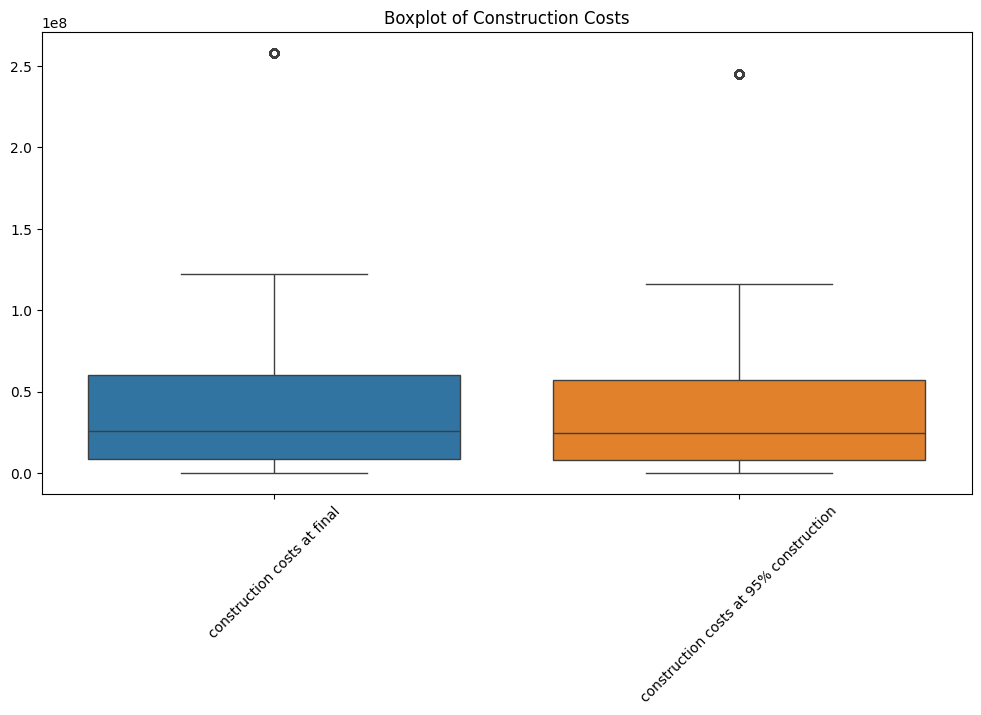

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Boxplot of Outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=df_cleaned[['construction costs at final', 'construction costs at 95% construction']])
plt.title("Boxplot of Construction Costs")
plt.xticks(rotation=45)
plt.show()


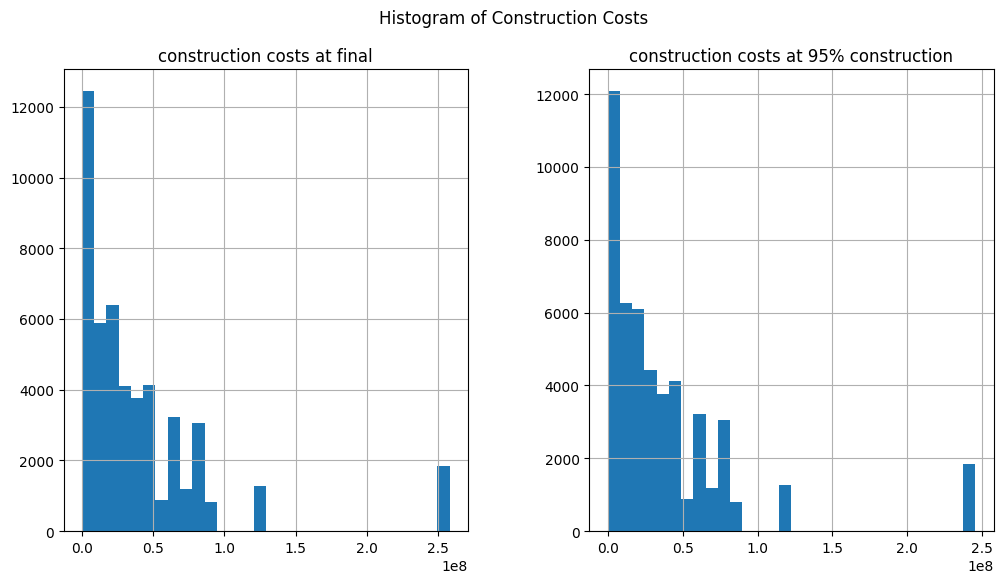

In [ ]:
#Histogram of Data Distribution
df_cleaned[['construction costs at final', 'construction costs at 95% construction']].hist(bins=30, figsize=(12,6))
plt.suptitle("Histogram of Construction Costs")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# 4. Splitting Data into Train and Test Sets
target = 'cash_expense_amount'  # Define the target variable
features = [col for col in df_cleaned.columns if col != target]
X = df_cleaned[features]
y = df_cleaned[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 5. Preprocessing Pipeline
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Convert categorical features to string to ensure uniform encoding
df_cleaned[categorical_features] = df_cleaned[categorical_features].astype(str)

# Ensure categorical columns are consistently treated as strings
X_train[categorical_features] = X_train[categorical_features].astype(str)
X_test[categorical_features] = X_test[categorical_features].astype(str)

# Preprocessing Pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])



In [ ]:
# 6. Model Training
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor',RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42))
])
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['budget_fiscal_year', 'fiscal_year', 'fiscal_period',
       'government_branch', 'cabinet', 'doc_version_no', 'doc_actg_line_no',
       'doc_pstng_line_no', 'doc_vendor_line_no', 'doc_comm_line_no',
       'doc_function_code', 'doc_phase_code', 'appropriation',
       'ref_vendor_line_no', 'ref...
       'general location', 'manager', 'phase_y', 'project id', 'pmas_dd',
       'pmas_pm', 'pmas_staterep', 'pmas_statesenate', 'tpc category',
       'construction_start_date', 'construction_end_date', 'design_start_date',
       'design_end_date', 'other_start_date', 'other_end_date',
       'fe_start_date', 'fe_end_date'],
      dtype='object'))])),
                ('regressor',
                 RandomForestRegressor(max_depth=10, n_estimators=50,
                                       random_state=42))])

In [ ]:
# 7. Model Evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:\nMAE: {mae}\nMSE: {mse}\nR2 Score: {r2}")

Model Performance:
MAE: 49612.30527499204
MSE: 33537441568.053356
R2 Score: 0.6595501918169884
